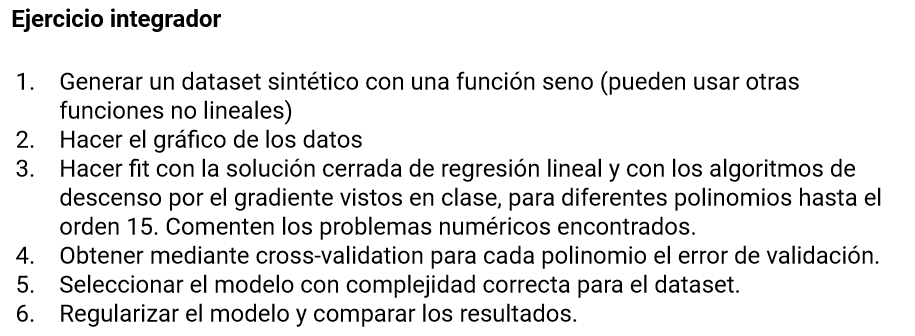

### Cargamos las librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


### Cargamos los módulos de métricas, dataset, modelos y optimización

In [2]:
from basic_metrics import MSE
from models import ConstantModel, LinearRegressionNumpy, LinearRegressionB
from gradient_descent import gradient_descent, stochastic_gradient_descent, mini_batch_gradient_descent
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### Creamos un dataset sintético:

In [3]:
# x_data = np.linspace(2, 7, num=40)
# y_data = np.cos(x_data) + np.random.normal(loc=1,scale=0.5, size=40) * 0.6

x_data = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y_data = np.sin(x_data * 1.5* np.pi ) 
y_data = (y_data + noise-1).reshape(-1,1)


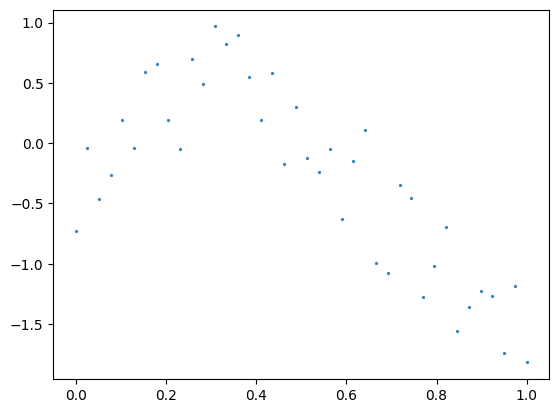

In [4]:
plt.scatter(x_data, y_data,alpha=0.8, s=2)
plt.show()

### Corremos los modelos (solución cerrada)

In [5]:
# Pueden crear las features polinómicas manualmente con NumPy empleando np.power o con SKlearn (PolynomialFeatures)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(15, include_bias=False)
poly_data = poly.fit_transform(x_data.reshape(-1, 1))

In [6]:
poly_data.shape

(40, 15)

In [7]:
# Creamos los column names para el dataframe (va a ser más fácil dar seguimiento luego)
colname = ['x']
for i in range(2, 16):
    colname.append('x_%d'%i)

colname.append('y')

In [8]:
data = pd.DataFrame(np.column_stack([poly_data,y_data]),columns=colname)

In [9]:
data.head()

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,y
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.732097
1,0.025641,0.000657,0.000017,4.322565e-07,1.108350e-08,2.841923e-10,7.286983e-12,1.868457e-13,4.790916e-15,1.228440e-16,3.149846e-18,8.076528e-20,2.070905e-21,5.310012e-23,1.361542e-24,-0.043273
2,0.051282,0.002630,0.000135,6.916105e-06,3.546720e-07,1.818831e-08,9.327338e-10,4.783250e-11,2.452949e-12,1.257923e-13,6.450885e-15,3.308146e-16,1.696485e-17,8.699924e-19,4.461499e-20,-0.459527
3,0.076923,0.005917,0.000455,3.501278e-05,2.693291e-06,2.071762e-07,1.593663e-08,1.225895e-09,9.429960e-11,7.253815e-12,5.579858e-13,4.292198e-14,3.301691e-15,2.539762e-16,1.953663e-17,-0.266490
4,0.102564,0.010519,0.001079,1.106577e-04,1.134951e-05,1.164052e-06,1.193899e-07,1.224512e-08,1.255910e-09,1.288113e-10,1.321141e-11,1.355017e-12,1.389761e-13,1.425395e-14,1.461944e-15,0.191359


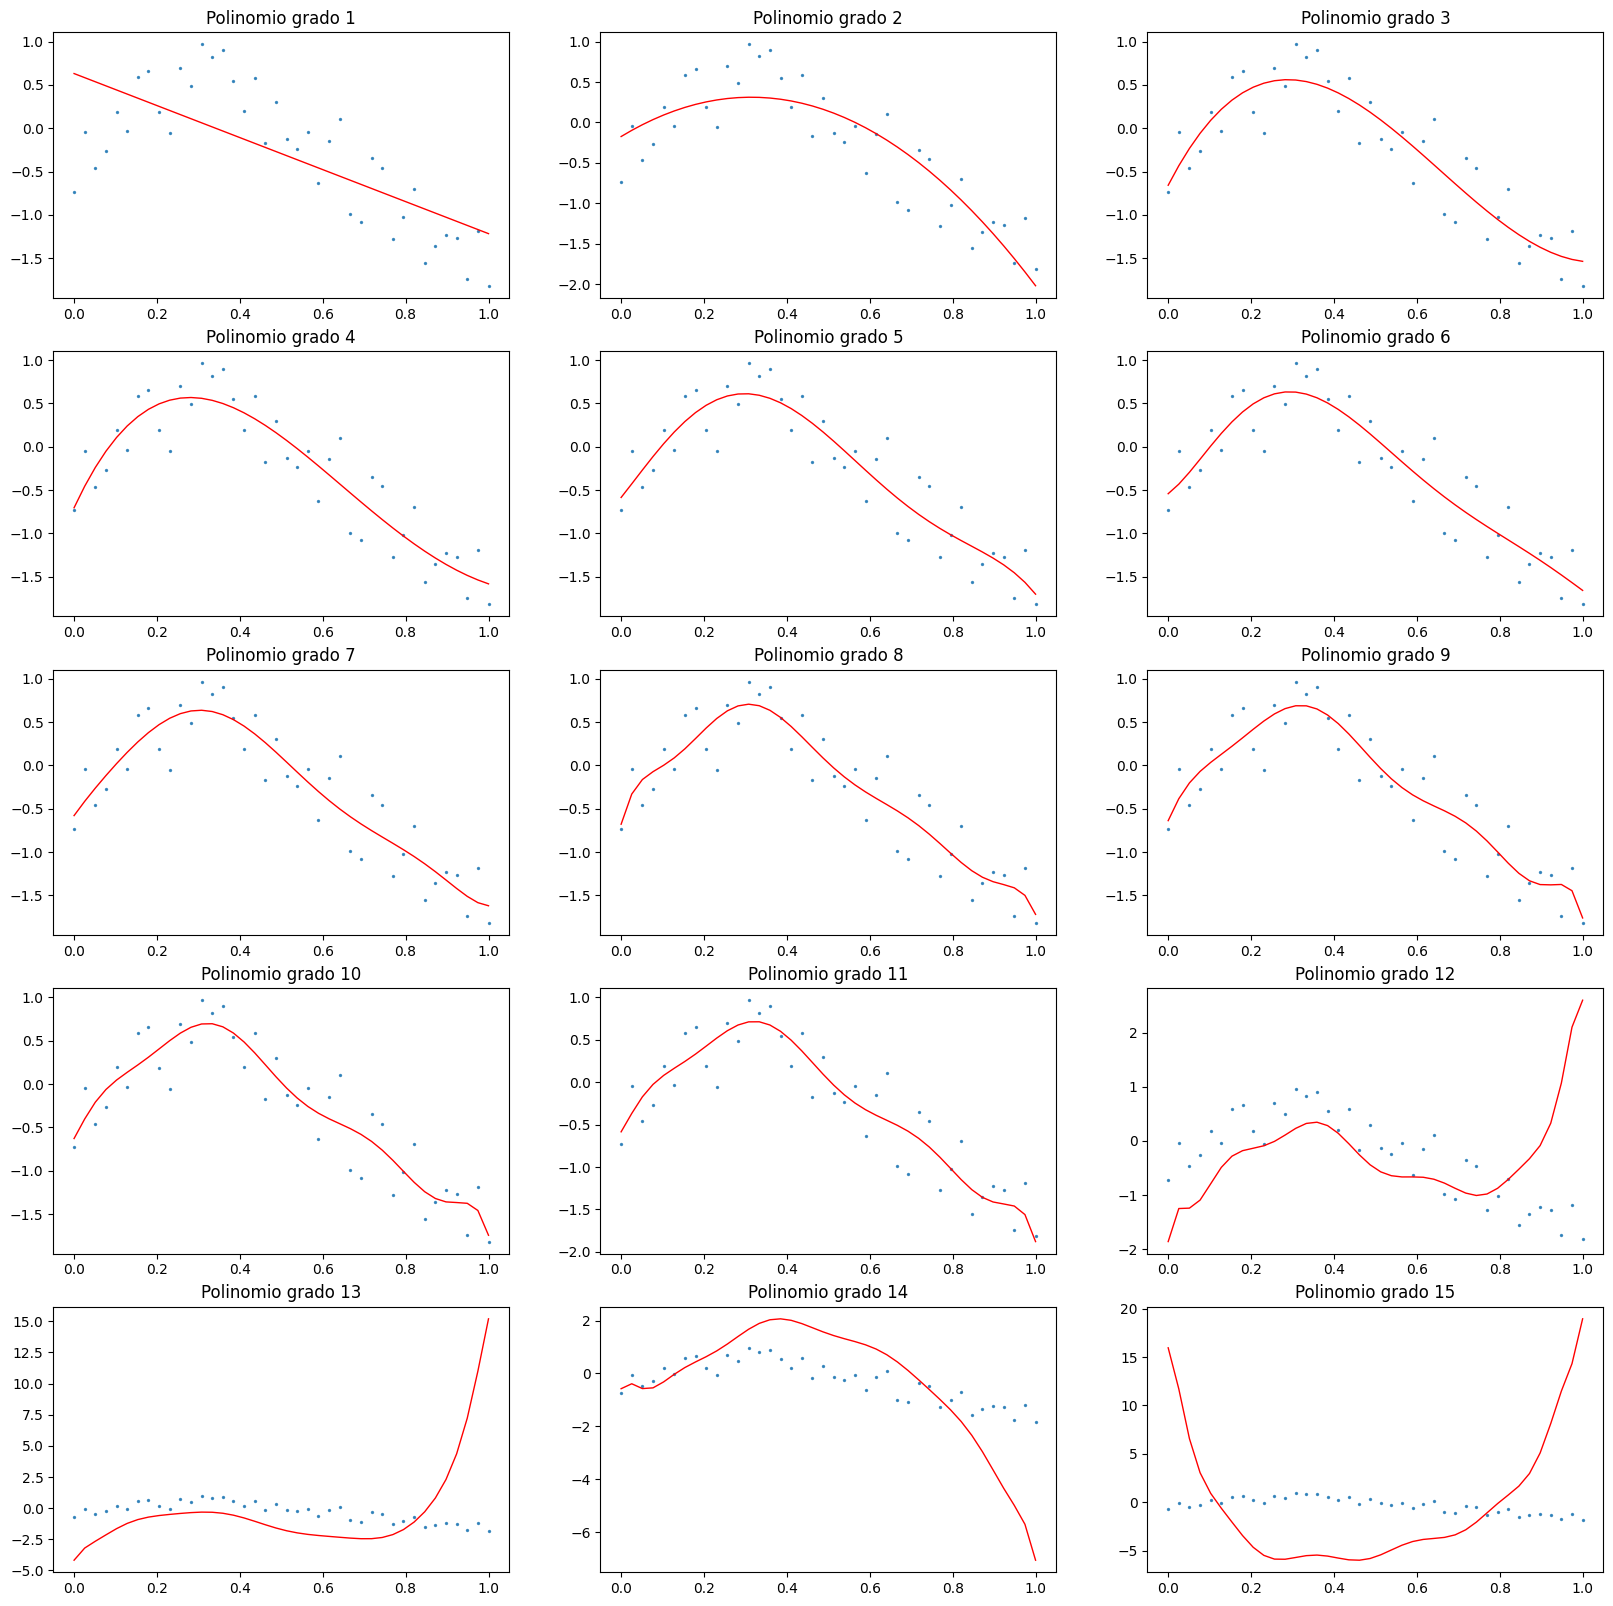

In [10]:
fig, axes = plt.subplots(figsize=(20, 20))
lr_mse = []
coef = []
for i in range (1,16):    
    pipe = Pipeline(steps=[
           ('select', StandardScaler()),
           ('clf', LinearRegressionB())
    ])

    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)
    y_pred = pipe.predict(x)

    
    plt.subplot(5, 3, i)
    plt.scatter(x_data, y_data, alpha=0.8, s=2)
    plt.plot(x_data, y_pred, color='red', linewidth=1)
    plt.title("Polinomio grado " + str(i))
    
    mse = MSE()
    lr_mse.append(mse(y, y_pred))
    coef.append(pipe.named_steps['clf'].coef_)
plt.show()

In [11]:
resultado = pd.DataFrame()
for i in range (15):
    resultado["x_"+ str(i+1) ] = np.reshape(np.vstack((lr_mse[i], coef[i], np.zeros((15-i,1)))), (-1))
resultado = resultado.rename(index={0:'ecm',1:'intercept',2:'coef_x_1',3:'coef_x_2',4:'coef_x_3',5:'coef_x_4',6:'coef_x_5',7:'coef_x_6',8:'coef_x_7',9:'coef_x_8',10:'coef_x_9',11:'coef_x_10',12:'coef_x_11',13:'coef_x_12',14:'coef_x_13',15:'coef_x_14',16:'coef_x_15'})

In [12]:
resultado

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
ecm,35.400524,41.415628,43.228697,43.243546,43.352638,43.369247,43.384750,43.527571,43.564133,43.486722,45.170992,5.040401e+01,5.611010e+02,2.217603e+02,1.818289e+03
intercept,-0.546896,0.919277,2.758300,3.058947,1.777883,1.061013,1.992783,5.631151,3.398018,2.605465,2.334733,1.794125e+01,1.753427e+01,1.017028e+01,-1.742726e+01
coef_x_1,-0.293285,-1.516589,-6.332928,-7.773967,1.972766,9.948405,-4.410793,-79.084120,-19.894447,6.524824,16.339203,-6.865440e+02,-3.785052e+02,-5.208928e+02,-2.176252e+03
coef_x_2,0.000000,-0.293285,3.081984,5.251355,-20.150052,-51.674416,28.087676,582.185761,16.831344,-298.637264,-441.555542,1.171245e+04,5.916898e+03,9.360154e+03,4.270998e+04
coef_x_3,0.000000,0.000000,-0.293285,-1.031612,26.308496,83.234464,-129.494340,-2158.787290,550.458382,2460.299088,3523.914062,-1.047222e+05,-5.184115e+04,-8.376272e+04,-3.829774e+05
coef_x_4,0.000000,0.000000,0.000000,-0.293285,-10.422517,-58.381568,236.287605,4315.839215,-3048.345563,-9747.666199,-14399.914062,5.591541e+05,2.707292e+05,4.399034e+05,1.948264e+06
coef_x_5,0.000000,0.000000,0.000000,0.000000,-0.293285,15.301648,-189.124227,-4777.161007,7093.564734,21532.834595,34334.843750,-1.911337e+06,-8.920734e+05,-1.443717e+06,-5.905395e+06
coef_x_6,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293285,56.156058,2764.515369,-8477.183609,-27893.568726,-50703.062500,4.333029e+06,1.902188e+06,2.991769e+06,1.013740e+07
coef_x_7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293285,-653.653600,5124.760134,21007.404907,47293.093750,-6.591152e+06,-2.607494e+06,-3.685842e+06,-6.512694e+06
coef_x_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293285,-1244.109699,-8476.064941,-27392.031250,6.654055e+06,2.169251e+06,1.882851e+06,-9.209870e+06


A medida que aumenta la complejidad del modelo los parametros del modelo cada vez se hacen más grande.

## Solución númerica:

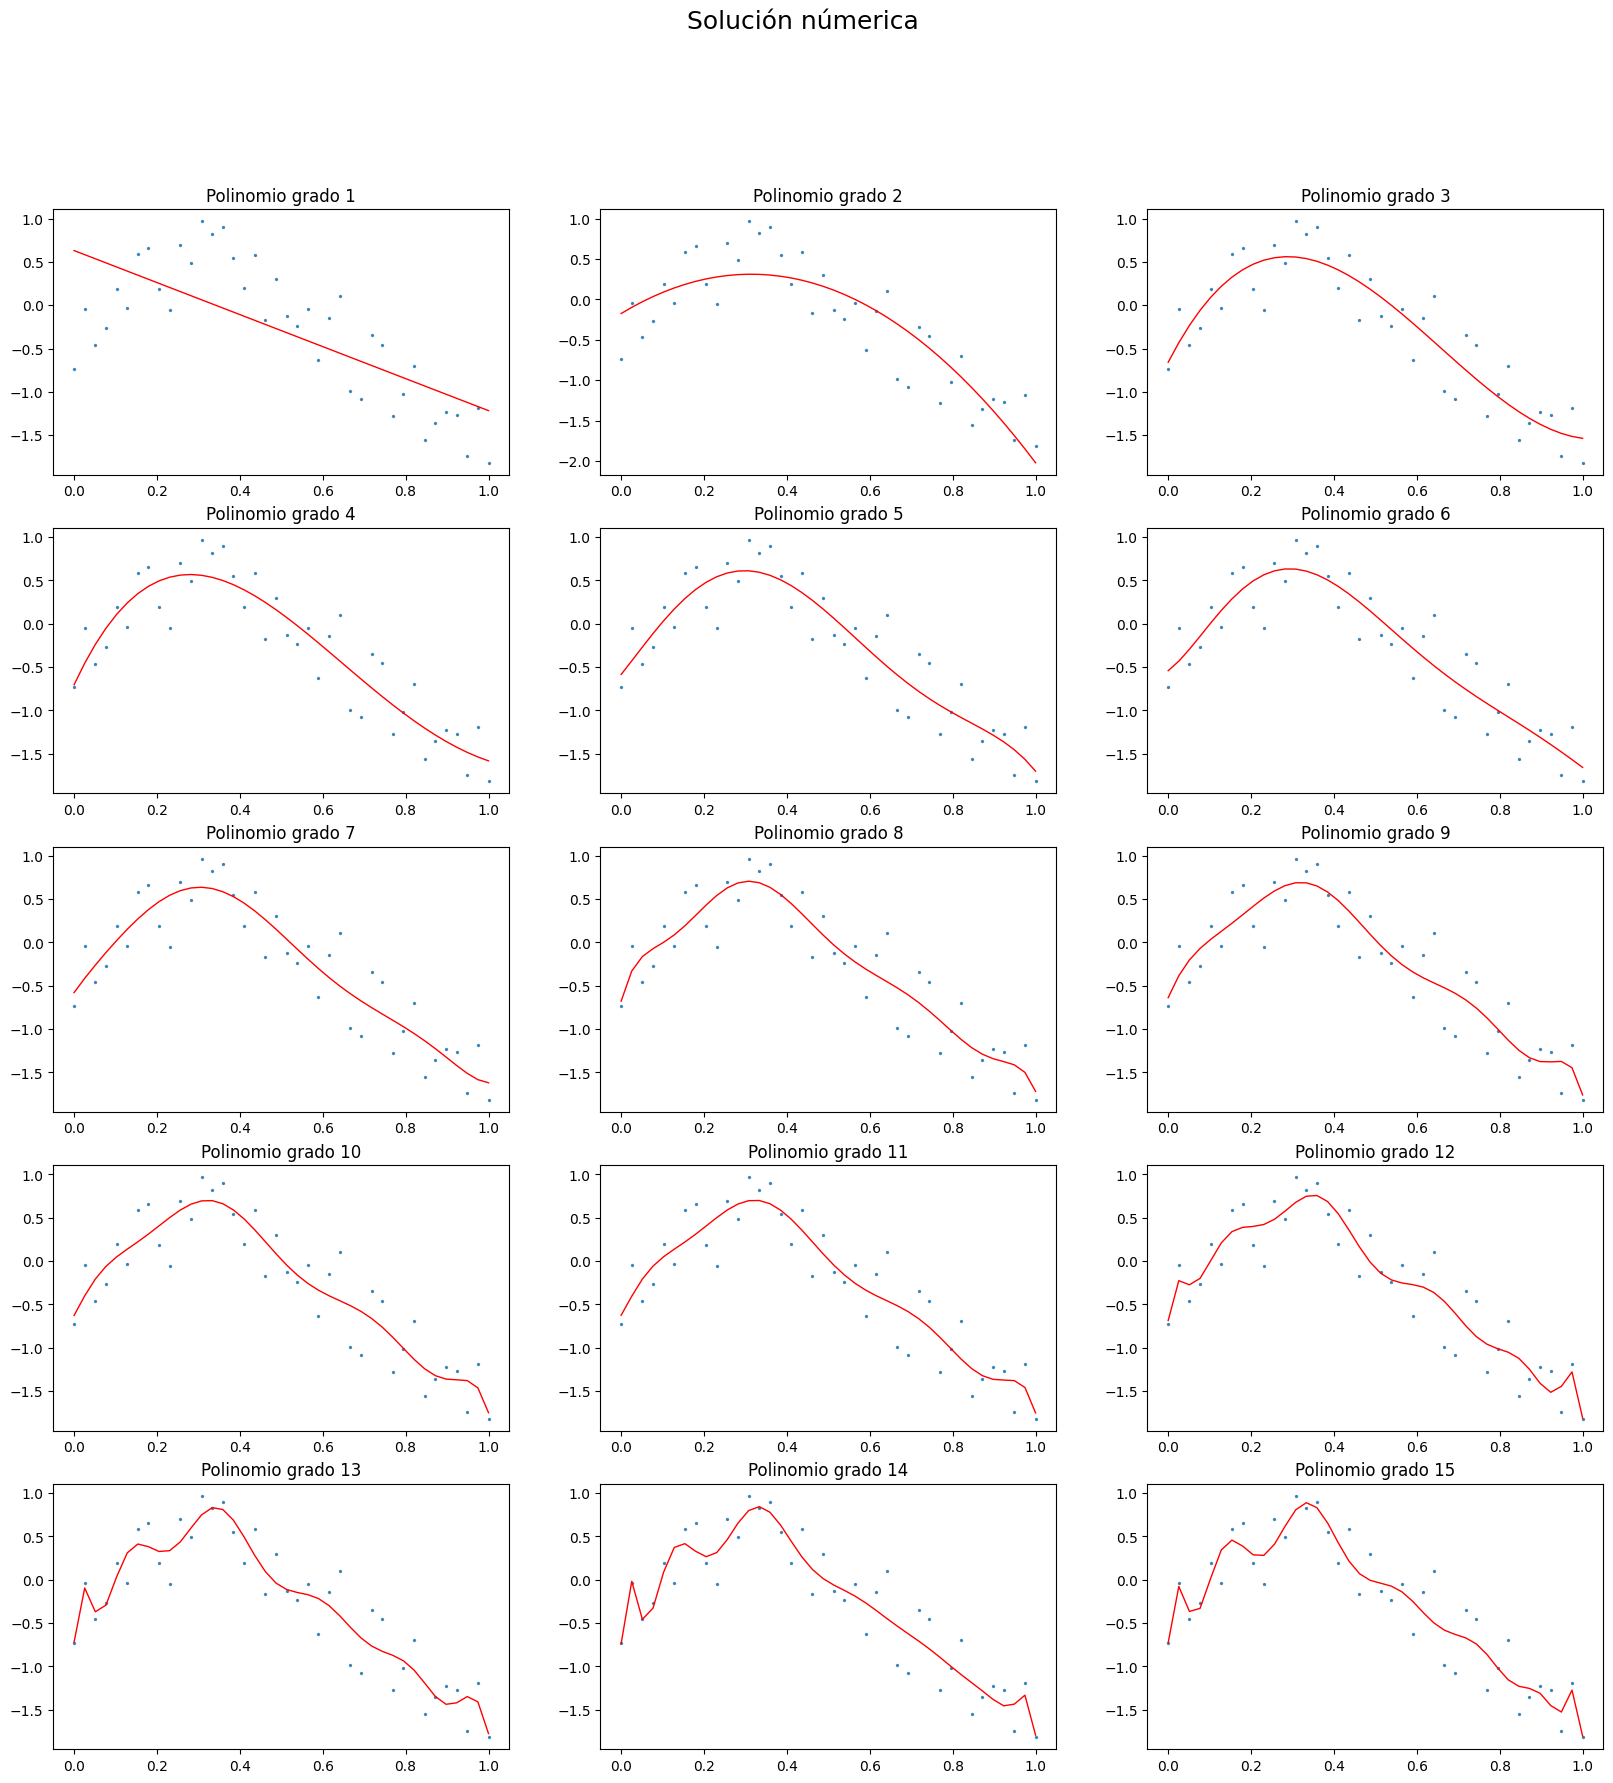

In [13]:
fig, axes = plt.subplots(figsize=(20, 20))

lr_mse = []
coef = []
for i in range (1,16):    
    pipe = Pipeline(steps=[
           ('select', StandardScaler()),
           ('clf', LinearRegression())
    ])


    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)
    y_pred = pipe.predict(x)

    
    plt.subplot(5, 3, i)
    plt.scatter(x_data, y_data, alpha=0.8, s=2)
    plt.plot(x_data, y_pred, color='red', linewidth=1)
    plt.title("Polinomio grado " + str(i))
    plt.suptitle("Solución númerica", fontsize=18)
    mse = MSE()
    lr_mse.append(mse(y, y_pred))
    coef.append(pipe.named_steps['clf'].coef_)
plt.show()

## Solución númerica regularizada Ridge

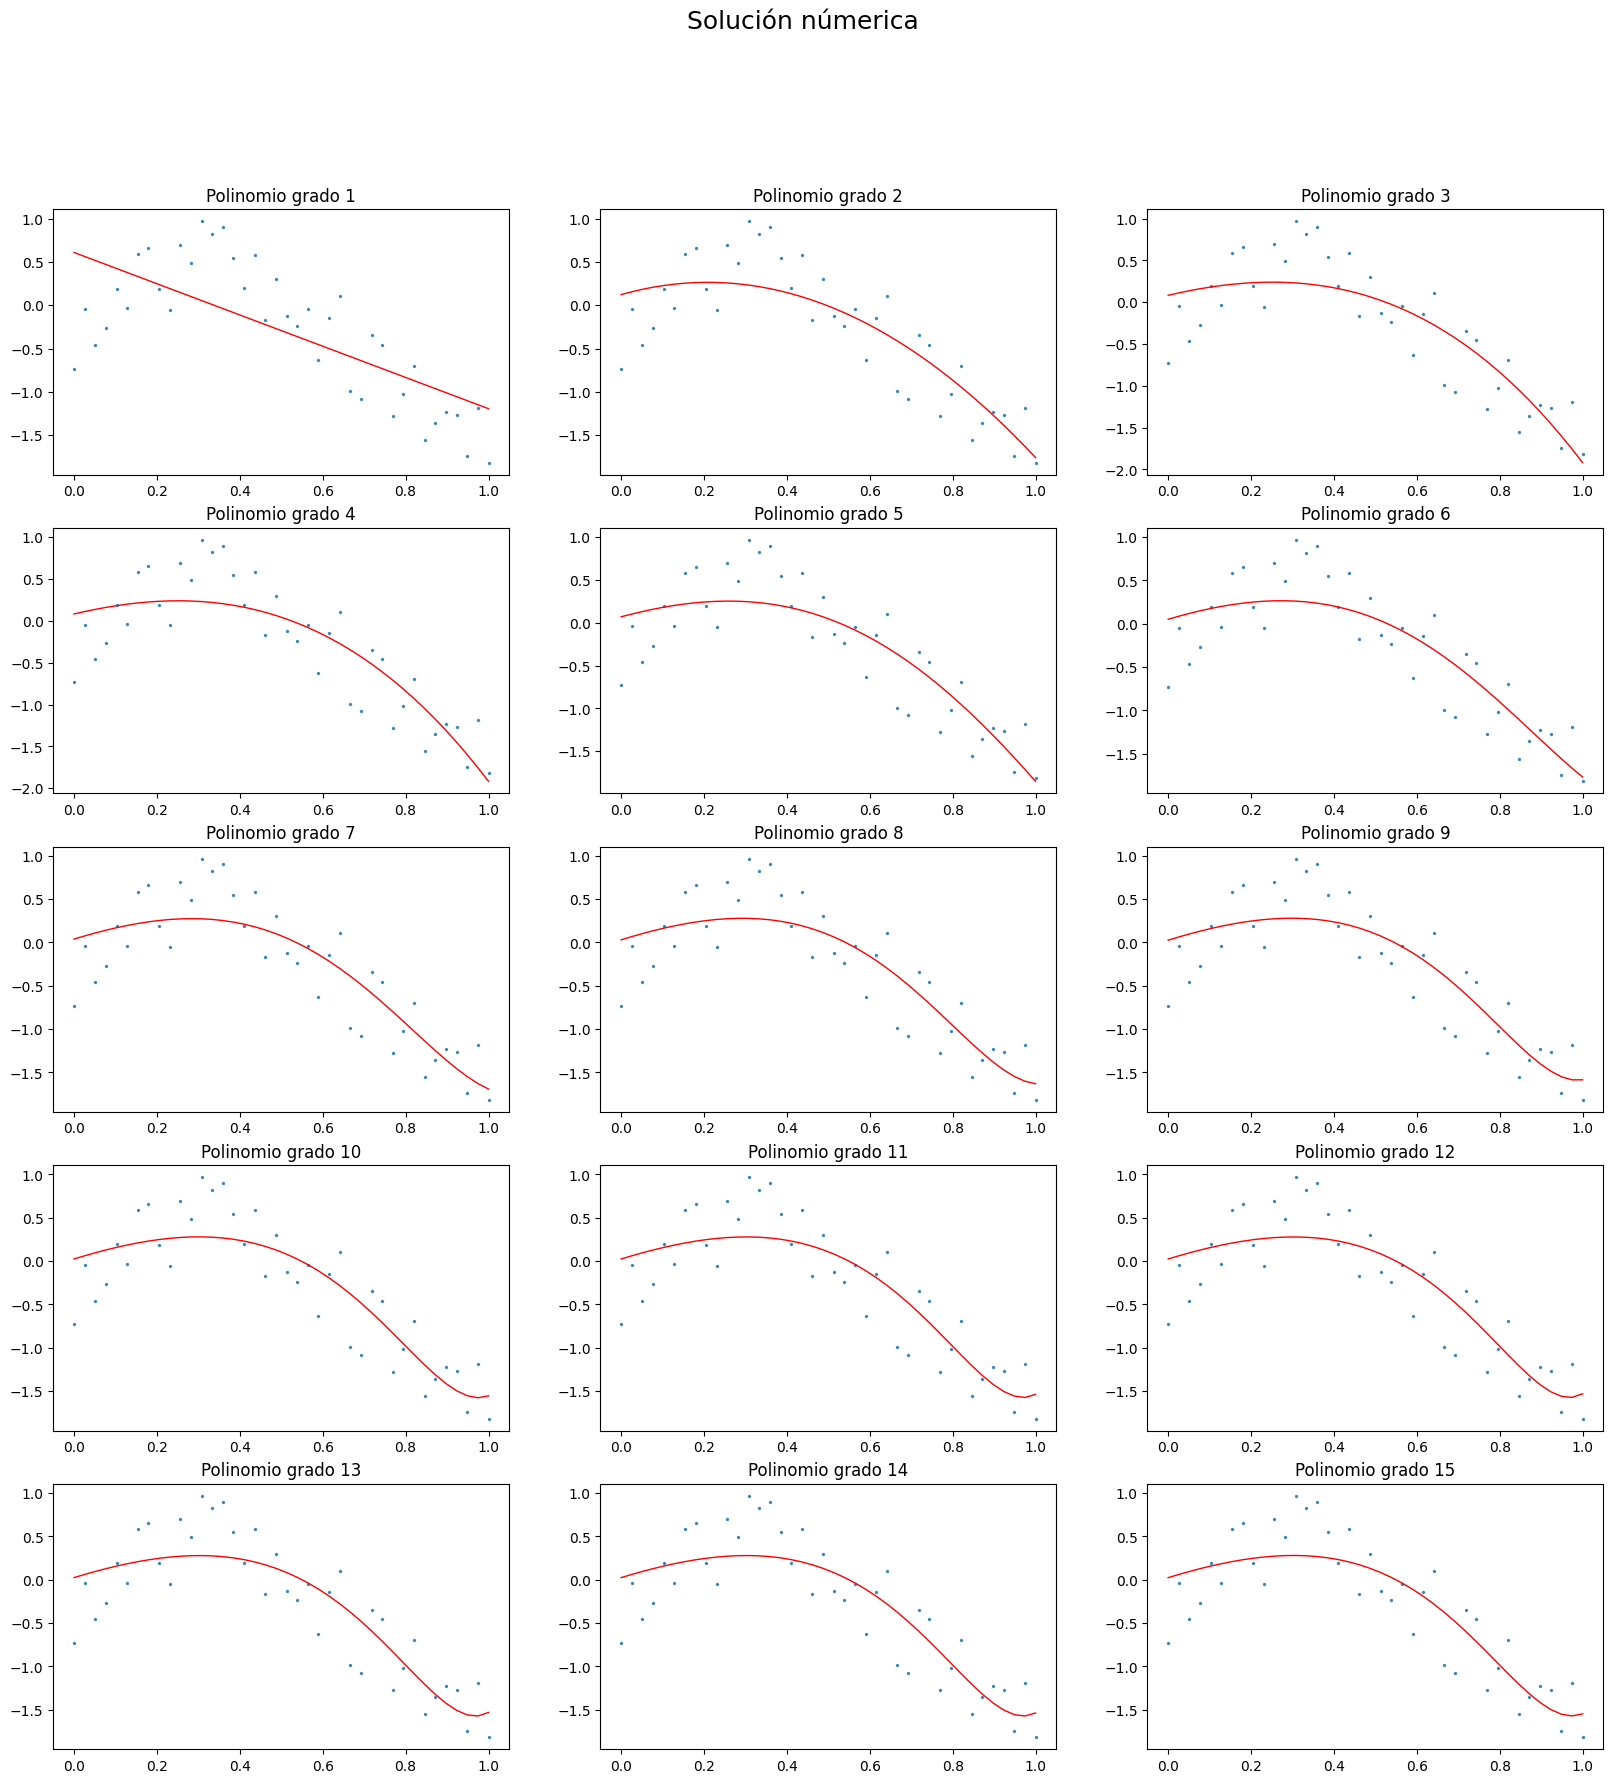

In [14]:
fig, axes = plt.subplots(figsize=(20, 20))

lr_mse = []
coef = []
for i in range (1,16):    
    pipe = Pipeline(steps=[
           ('select', StandardScaler()),
           ('clf', Ridge())
    ])


    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)
    y_pred = pipe.predict(x)

    
    plt.subplot(5, 3, i)
    plt.scatter(x_data, y_data, alpha=0.8, s=2)
    plt.plot(x_data, y_pred, color='red', linewidth=1)
    plt.title("Polinomio grado " + str(i))
    plt.suptitle("Solución númerica", fontsize=18)
    mse = MSE()
    lr_mse.append(mse(y, y_pred))
    coef.append(pipe.named_steps['clf'].coef_)
plt.show()

## Gradient Descent

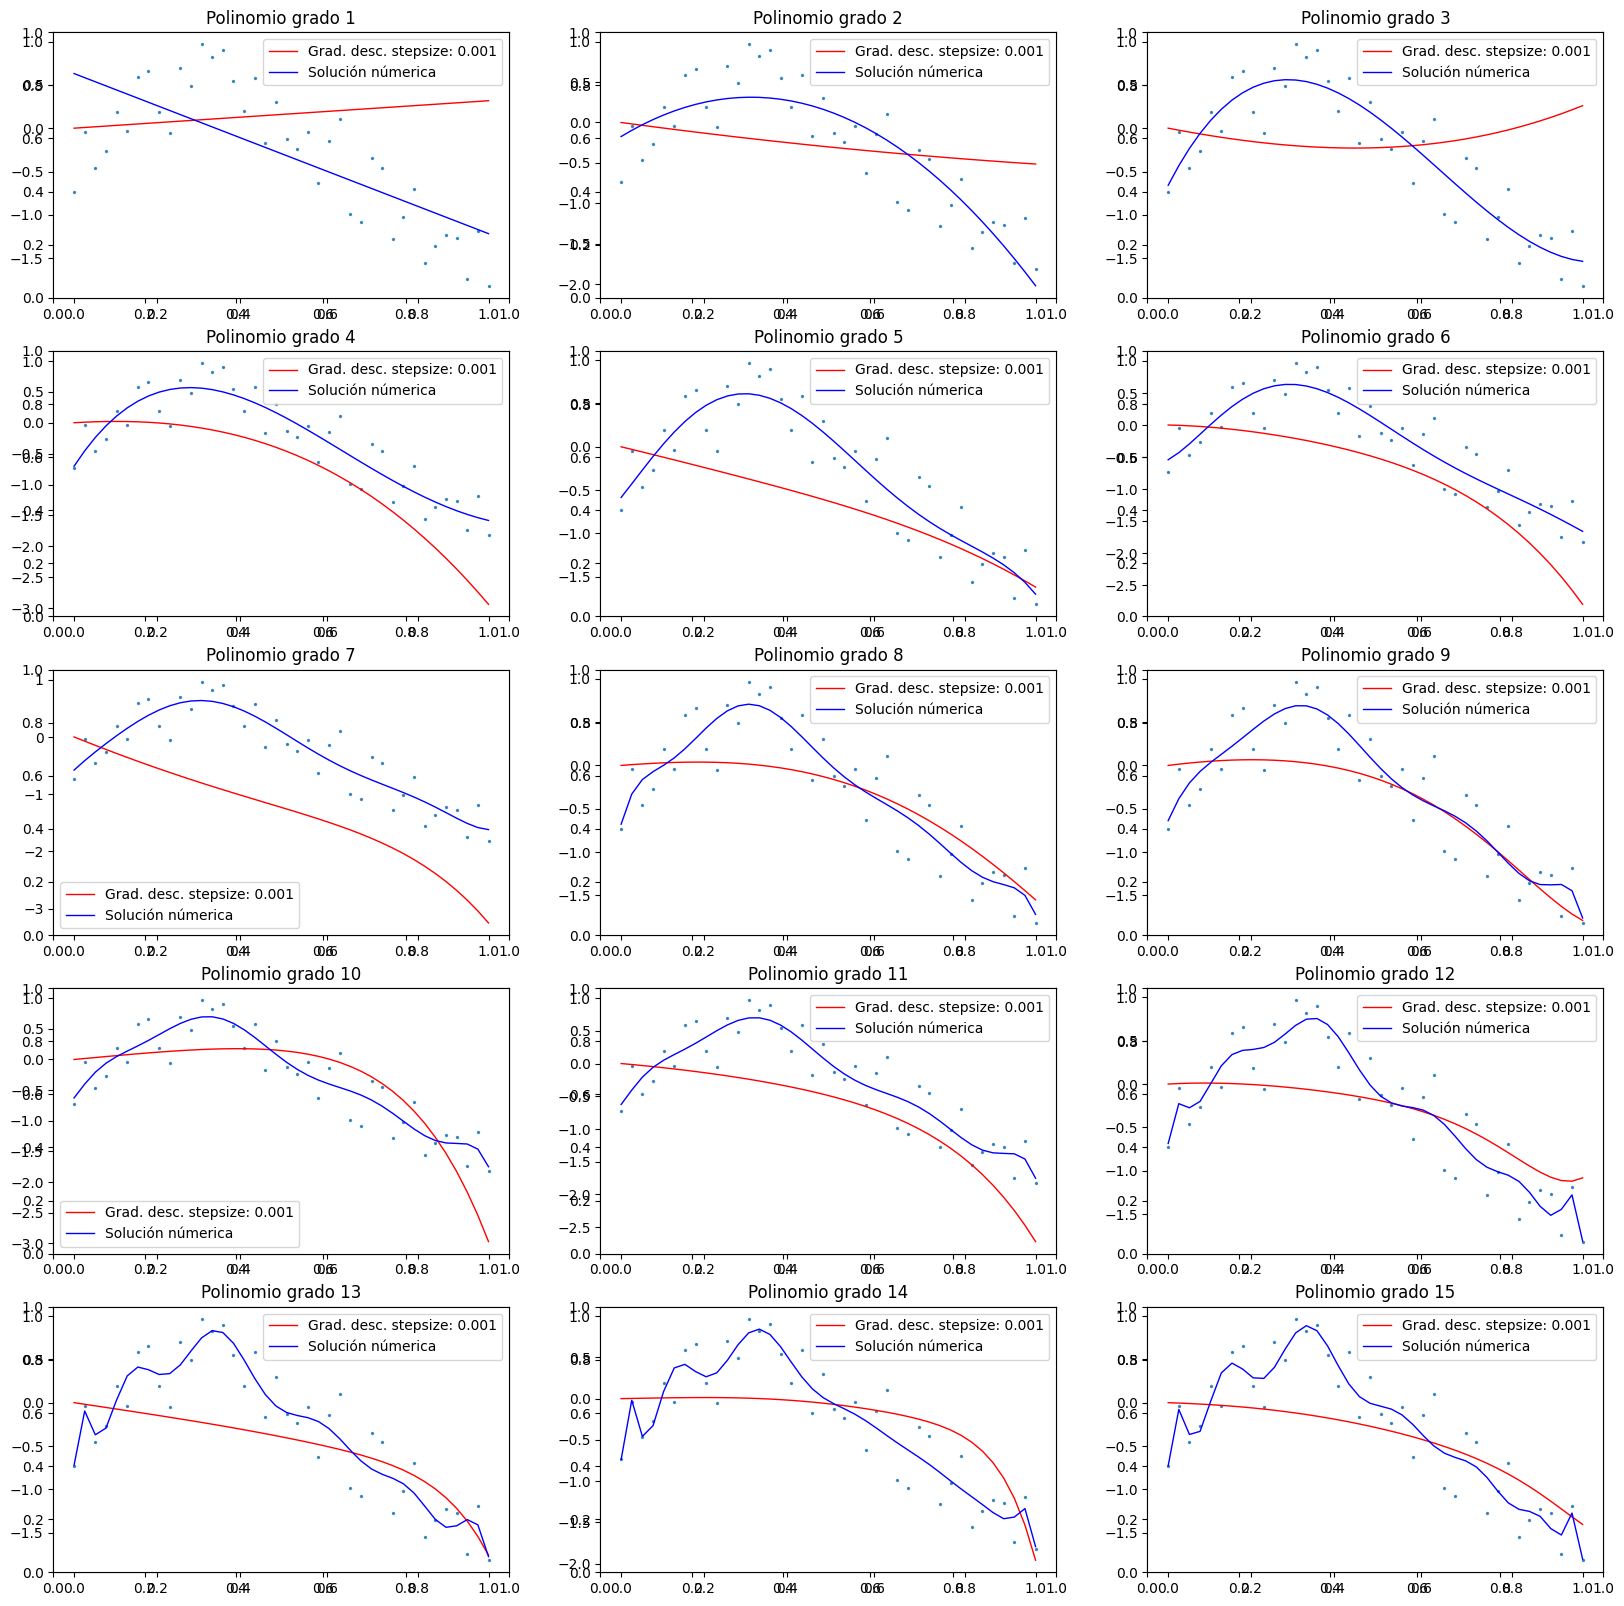

In [21]:
from gradient_descent import gradient_descent, stochastic_gradient_descent, mini_batch_gradient_descent

fig = plt.figure(figsize = (20,20))
coef = []
W_manual = []
for i in range (1,16): 
    pipe = Pipeline(steps=[
                   ('select', StandardScaler()),
                   ('clf', LinearRegression())
                ])

    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)

    # Expand the input with a column of "1"
    X_expanded = np.hstack((x, np.ones((len(x),1))))
    # Hyperparameters

    # Set up the learning rate
    lr_2 = 0.001
    # Set up the n° of epochs
    amt_epochs_2 = 5000


    W_manual= gradient_descent(X_expanded, y, lr=lr_2, amt_epochs=amt_epochs_2)


    coef.append(W_manual)
    ax = fig.add_subplot(5, 3, i)

    #Plot resulting fits on data
    ax = fig.add_subplot(5, 3, i)
    ax.scatter(x_data, y_data, alpha=0.8, s=2)
    y_pred = pipe.predict(x)
    plt.title("Polinomio grado " + str(i))
    ax.plot(x_data, x@W_manual[1:,:], label ='Grad. desc. stepsize: {}'.format(lr_2),color='red', linewidth=1)
    ax.plot(x_data, y_pred, label ='Solución númerica' ,color='blue', linewidth=1)
    ax.legend()
plt.show()

## Stochastic Gradient Descent

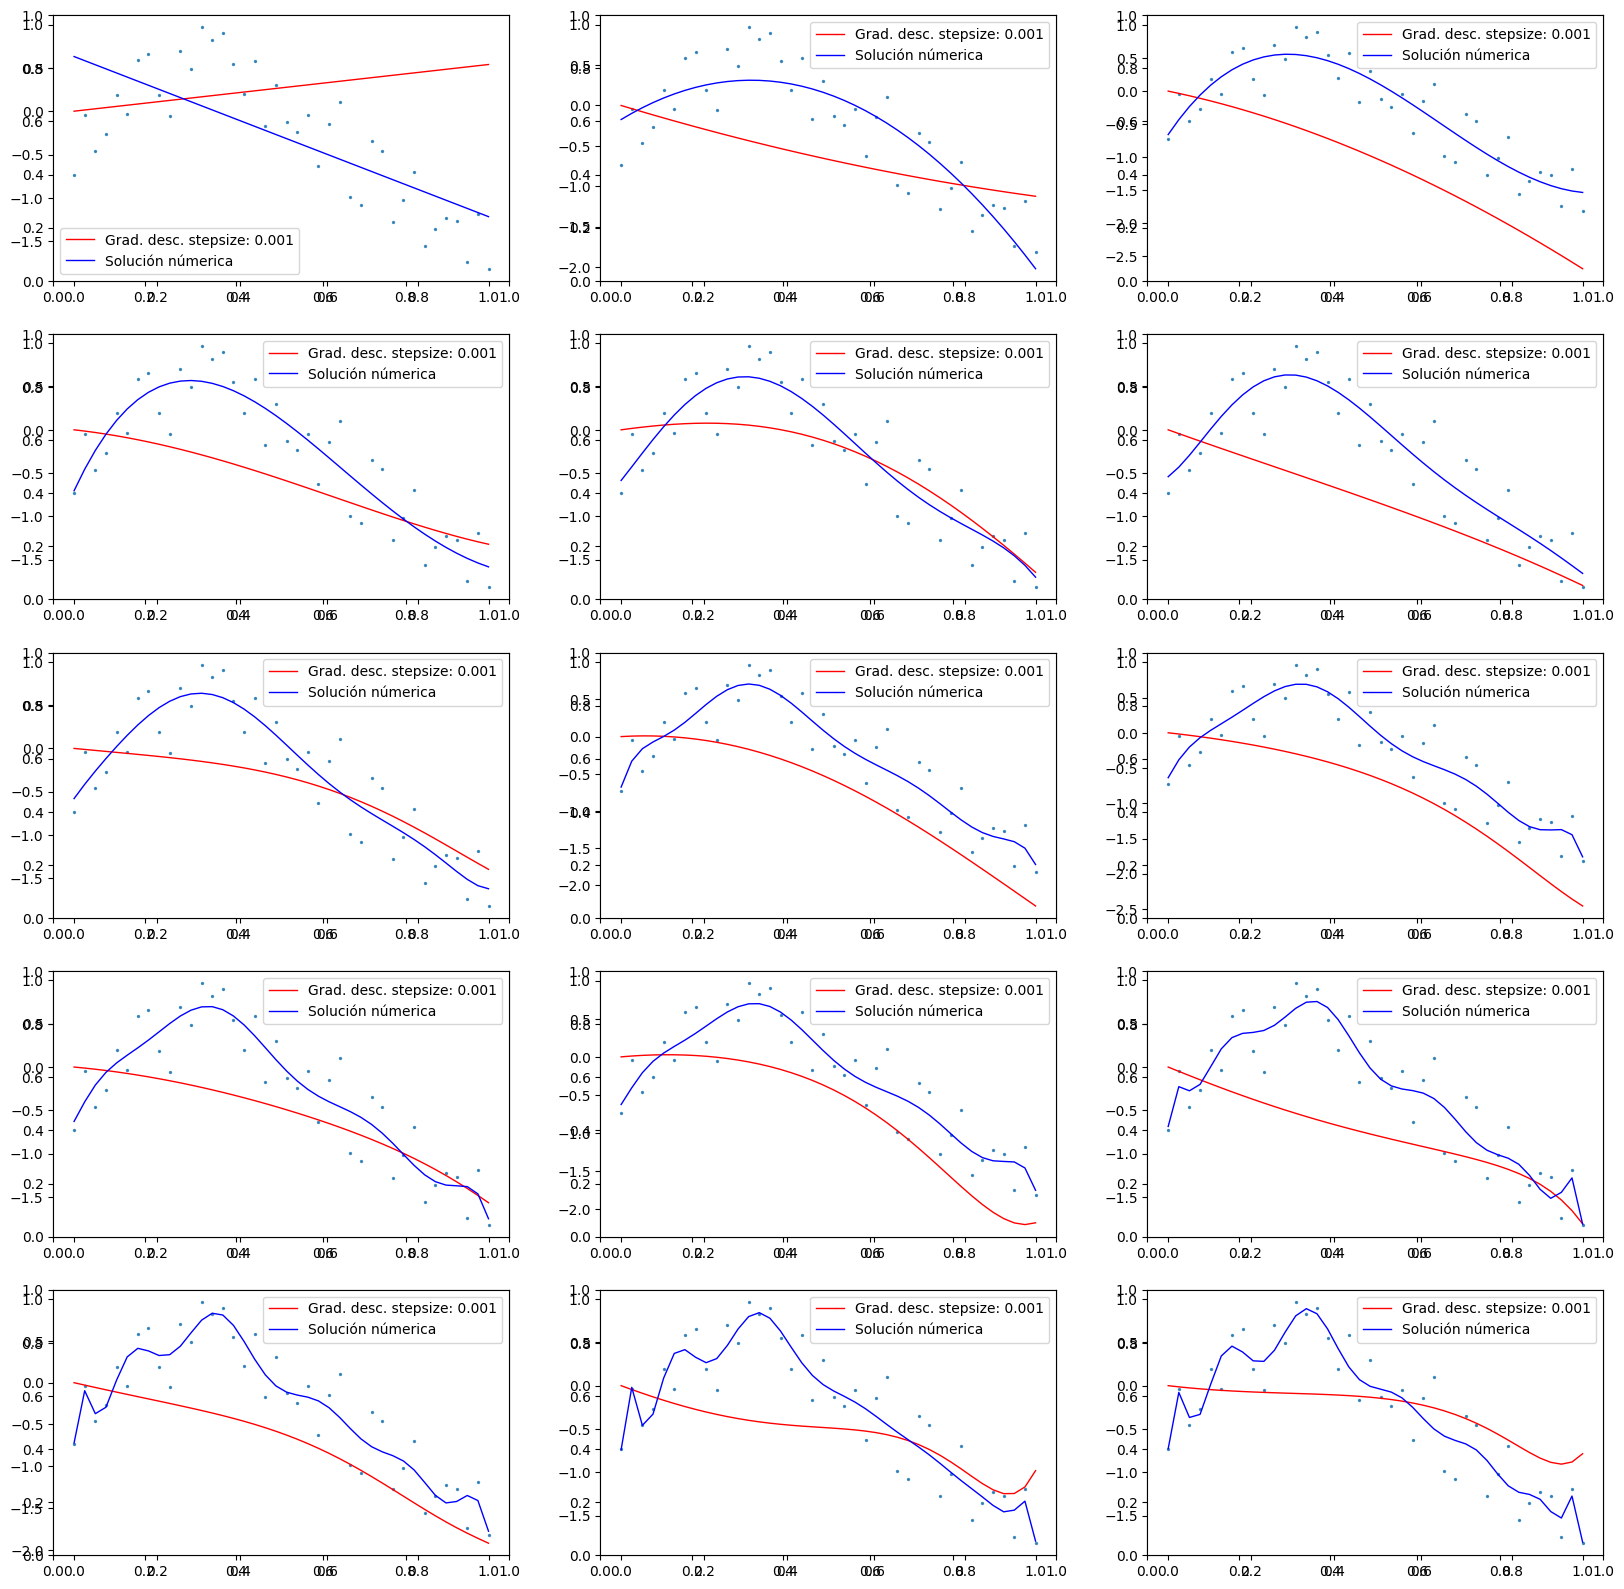

In [25]:
fig = plt.figure(figsize = (20,20))
coef = []
for i in range (1,16): 
    pipe = Pipeline(steps=[
                   ('select', StandardScaler()),
                   ('clf', LinearRegression())
                ])


    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)

    # Expand the input with a column of "1"
    X_expanded = np.hstack((x, np.ones((len(x),1))))

    # Hyperparameters

    # Set up the learning rate
    lr_2 = 0.001
    # Set up the n° of epochs
    amt_epochs_2 = 5000


    W_manual = stochastic_gradient_descent(X_expanded, y, lr=lr_2, amt_epochs=amt_epochs_2)

    coef.append(W_manual)
    ax = fig.add_subplot(5, 3, i)


    #Plot resulting fits on data
    ax = fig.add_subplot(5, 3, i)
    ax.scatter(x_data, y_data, alpha=0.8, s=2)
    y_pred = pipe.predict(x)
    ax.plot(x_data, x@W_manual[1:,:], label ='Grad. desc. stepsize: {}'.format(lr_2),color='red', linewidth=1)
    ax.plot(x_data, y_pred, label ='Solución númerica' ,color='blue', linewidth=1)
    ax.legend()
plt.show()

#### Mini-Batch Gradient Descent

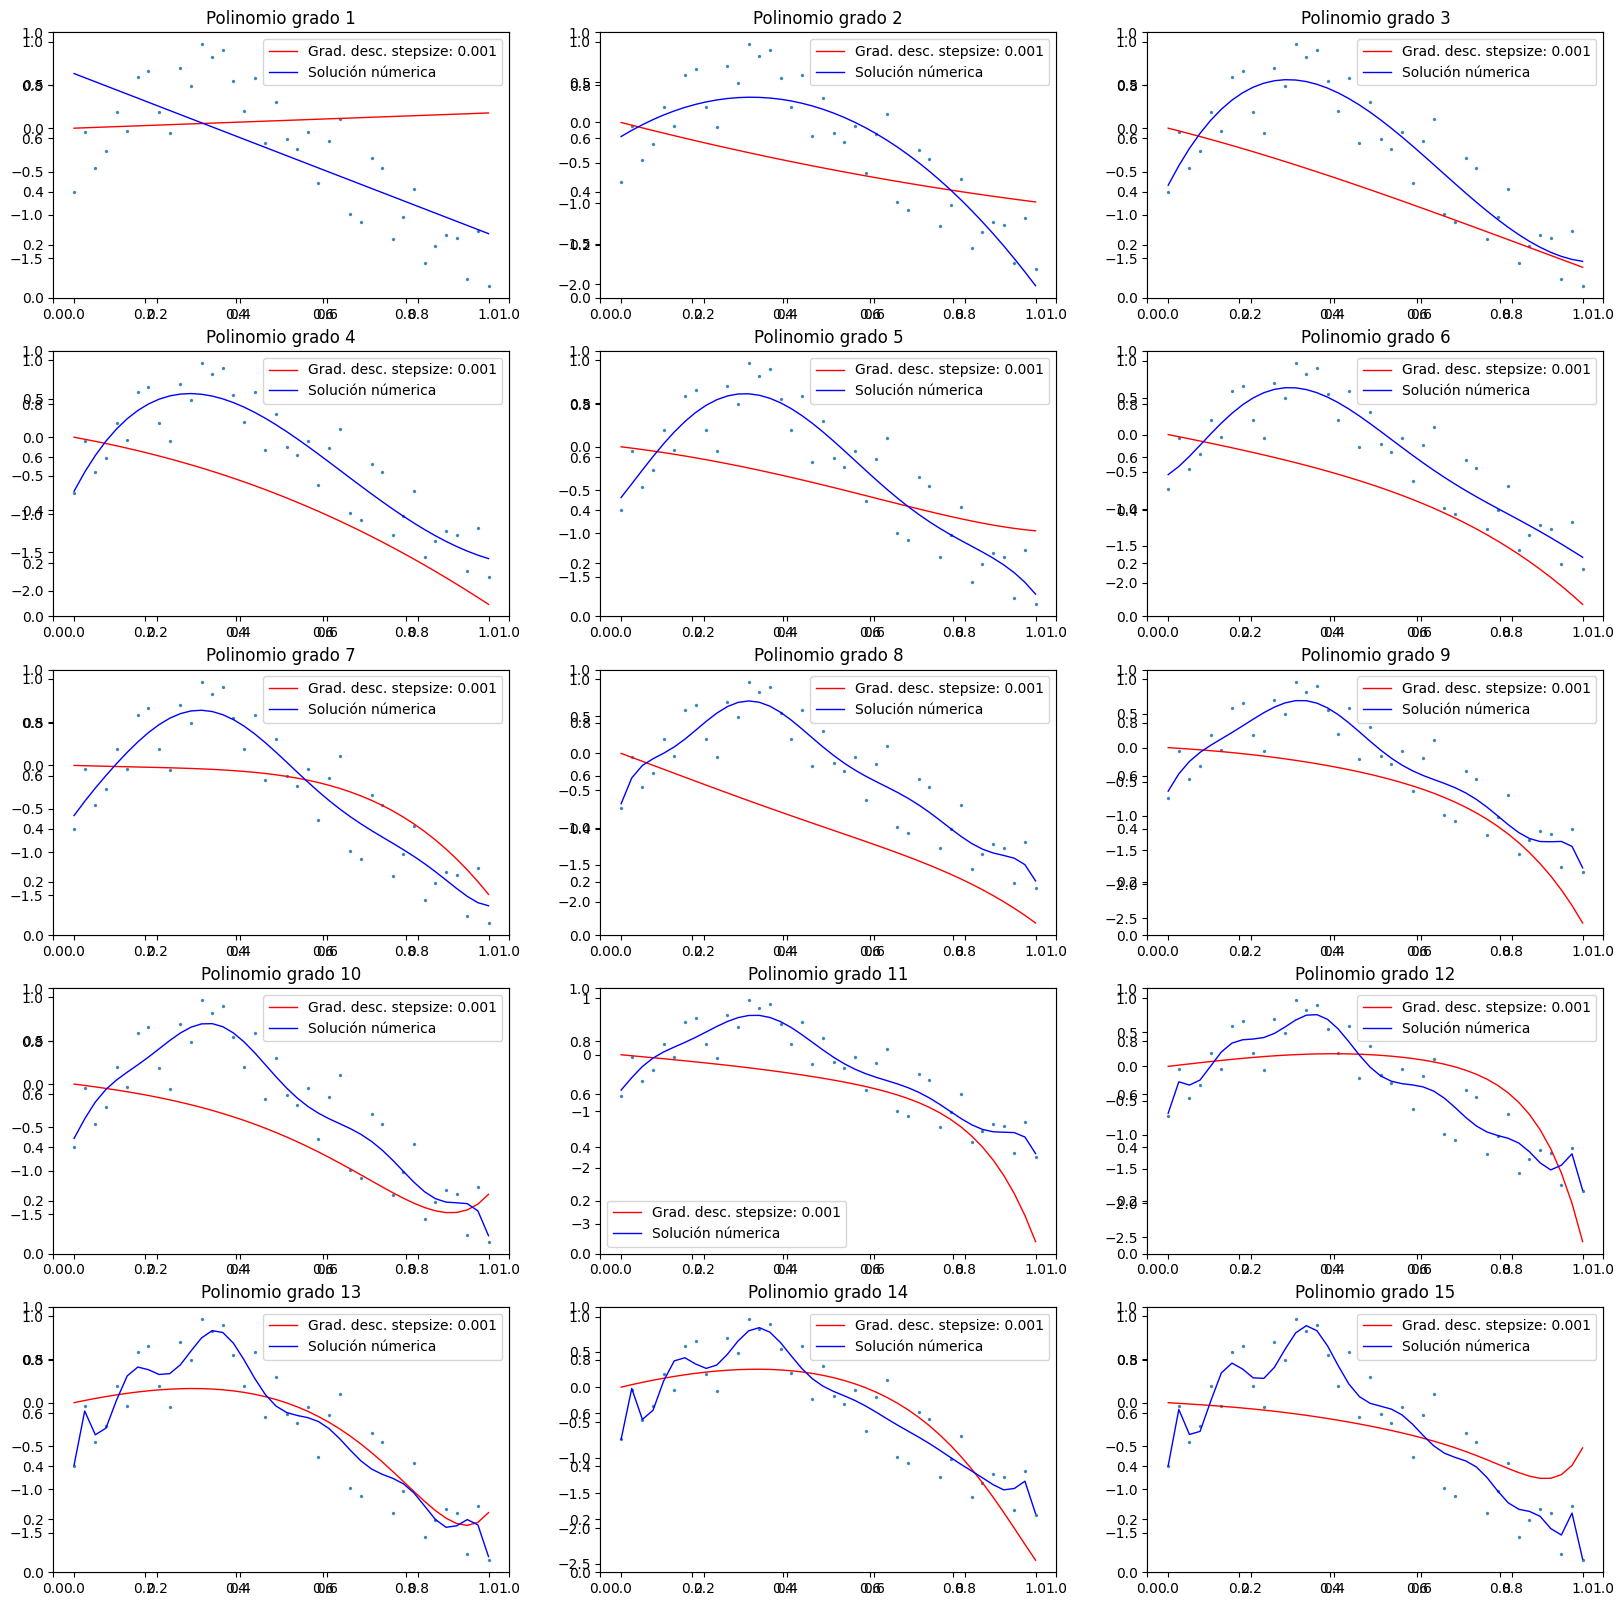

In [29]:
fig = plt.figure(figsize = (20,20))
coef = []
for i in range (1,16): 
    pipe = Pipeline(steps=[
                   ('select', StandardScaler()),
                   ('clf', LinearRegression())
                ])


    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))
    pipe.fit(x,y)

    # Expand the input with a column of "1"
    X_expanded = np.hstack((x, np.ones((len(x),1))))

    # Hyperparameters

    # Set up the learning rate
    lr_2 = 0.001
    # Set up the n° of epochs
    amt_epochs_2 = 5000


    W_manual = mini_batch_gradient_descent(X_expanded, y, lr=lr_2, amt_epochs=amt_epochs_2)

    coef.append(W_manual)
    ax = fig.add_subplot(5, 3, i)


    #Plot resulting fits on data
    ax = fig.add_subplot(5, 3, i)
    ax.scatter(x_data, y_data, alpha=0.8, s=2)
    y_pred = pipe.predict(x)
    plt.title("Polinomio grado " + str(i))
    ax.plot(x_data, x@W_manual[1:,:], label ='Grad. desc. stepsize: {}'.format(lr_2),color='red', linewidth=1)
    ax.plot(x_data, y_pred, label ='Solución númerica' ,color='blue', linewidth=1)
    ax.legend()
plt.show()

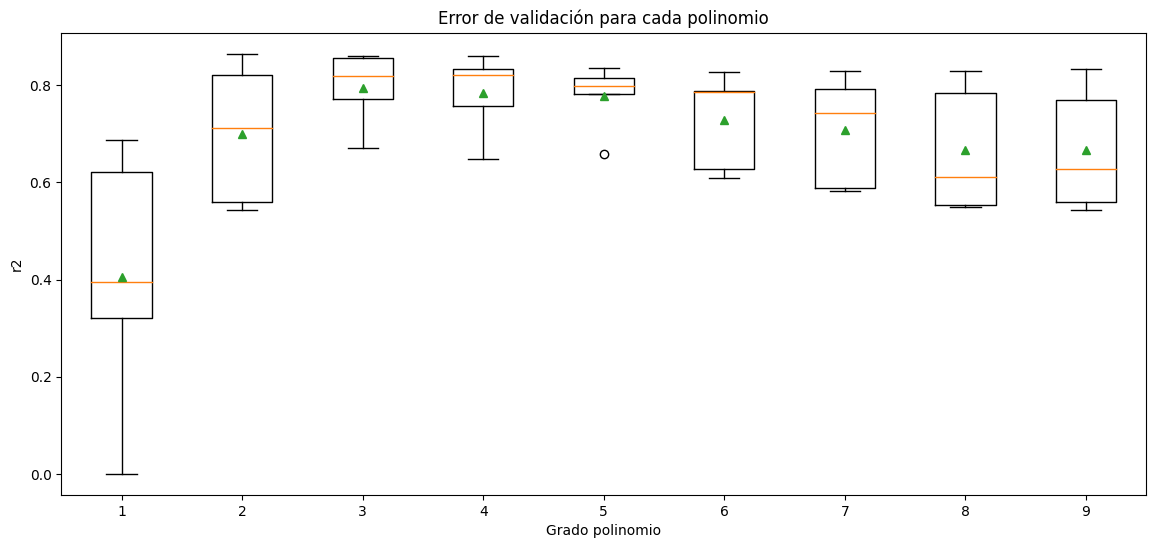

In [34]:
results=[]

for i in range (1,10):
    pipe = Pipeline(steps=[
                       ('select', StandardScaler()),
                       ('clf', LinearRegression())
                    ])
    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))

    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    cv_results = cross_validate(pipe, x, y, scoring='r2', cv=folds)

    results.append(cv_results['test_score'])

fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,showmeans=True)
axes.set_xlabel("Grado polinomio")
axes.set_ylabel("r2")
axes.set_title("Error de validación para cada polinomio");
plt.show()

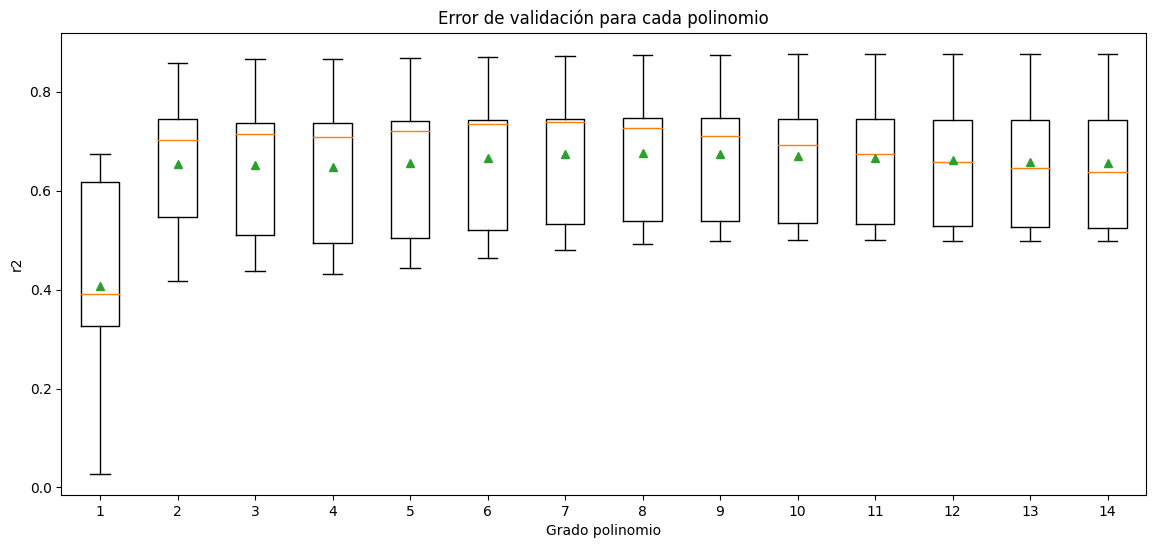

In [35]:
results=[]

for i in range (1,15):
    pipe = Pipeline(steps=[
                       ('select', StandardScaler()),
                       ('clf', Ridge())
                    ])
    x = data.iloc[:,0:i]
    y = np.reshape(data.y.values, (-1,1))

    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    cv_results = cross_validate(pipe, x, y, scoring='r2', cv=folds)

    results.append(cv_results['test_score'])

fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,showmeans=True)
axes.set_xlabel("Grado polinomio")
axes.set_ylabel("r2")
axes.set_title("Error de validación para cada polinomio");
plt.show()